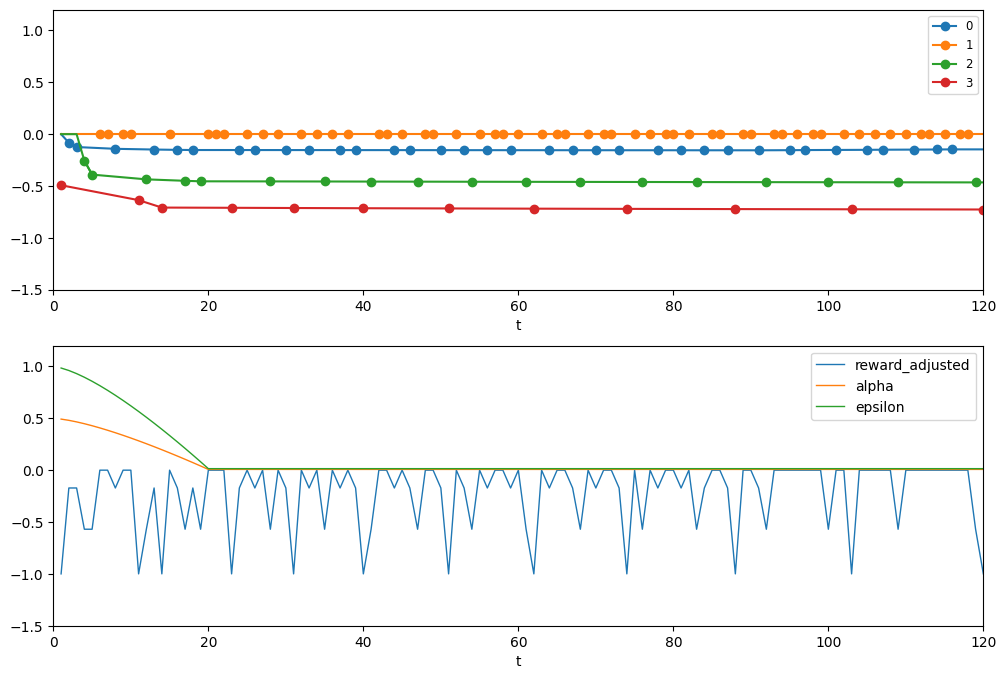

In [3]:
# This will start live plotting the newest log file

# project_path = r'/Users/schnuckiputz/other/git'

import os
import glob
import time
from IPython import display

import matplotlib.pyplot as plt
import pandas as pd

from log_plotting import plot_q_learning_separate


def get_latest_log_file(path):
    list_of_files = glob.glob(os.path.join(path, 'rl', 'logs', '*'))
    if not list_of_files:
        raise FileNotFoundError("No log files found in the specified directory.")
    return max(list_of_files, key=os.path.getctime)

def read_log_file(filename):
    try:
        return pd.read_csv(filename, header=0)
    except PermissionError as e:
        print(f"PermissionError: {e}")
        return None

def clear_axes(axes, max_steps):
    for axis in axes:
        axis.clear()
        axis.set_xlim(0, max_steps)
        axis.set_ylim(-1.5, 1.2)

def live_plot(log_filename, fig, ax, max_steps):
    while True:
        df = read_log_file(log_filename)
        if df is None:
            break
        
        df_plot = df
        clear_axes(ax, max_steps)
        plot_q_learning_separate(df_plot, ax)
        
        display.clear_output(wait=True)
        display.display(fig)
        plt.close(fig)
        
        time.sleep(0.1)
        
        if len(df) >= max_steps:
            break

current_path = os.getcwd()
log_filename = get_latest_log_file(current_path)
max_steps = 120

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
live_plot(log_filename, fig, ax, max_steps)
